# Linear Regression - Exploring the relationship between advertising channels and sales

*What is the relationship between each advetising channel (TV, Radio, Newspaper) and sales?*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Advertising.csv")

In [3]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


Exploring visually the relationship between each advertising channel and sales.

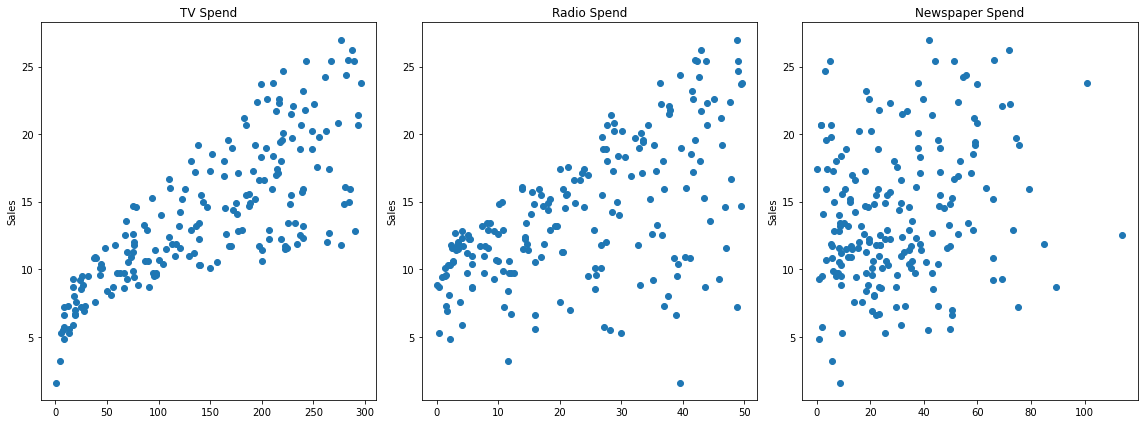

In [4]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,6))

axes[0].plot(df['TV'], df['sales'], 'o')
axes[0].set_ylabel('Sales')
axes[0].set_title('TV Spend')

axes[1].plot(df['radio'], df['sales'], 'o')
axes[1].set_ylabel('Sales')
axes[1].set_title('Radio Spend')

axes[2].plot(df['newspaper'], df['sales'], 'o')
axes[2].set_ylabel('Sales')
axes[2].set_title('Newspaper Spend')

plt.tight_layout();

Looks like TV spend and radio spend has a clearly a positive correlation with sales. For newspaper spend, though, it is less clear if that is a correlation.

## Spliting the Training set and Test set

Spliting the features and the label.

In [5]:
X = df.drop('sales', axis=1)

In [6]:
X.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [7]:
y = df['sales']

In [8]:
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

Spliting the training set and test set.

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=101)

## Creating the Model (or Estimator)

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
model = LinearRegression()

## Training the model

In [13]:
model.fit(X_train, y_train)

LinearRegression()

## Making predicitions and Evaluating the model

In [14]:
test_predictions = model.predict(X_test)

Taking a look in the mean and the distribution of the sales values. We are going to use that, to compare with the error.

In [15]:
df['sales'].mean()

14.022500000000003

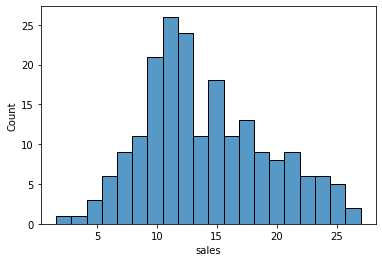

In [16]:
sns.histplot(df, x='sales', bins=20)

### Performance Metrics

In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

*Mean Absolute Error*     

We can compare this with the mean value, so we can see that the error is about 10% of the mean value.

In [18]:
mean_absolute_error(y_test, test_predictions)

1.2137457736144808

*Mean Squared Error*

We can't compare this with the mean value, bacause it is squared. 

In [19]:
mean_squared_error(y_test, test_predictions)

2.298716697886378

*Root Mean Squared Error*

We can compare this with the mean value, so we can see that the error is about 10% of the mean value. 
This value is okay and our model is dealing well with outliers.

In [20]:
np.sqrt(mean_squared_error(y_test, test_predictions))

1.5161519375993877

## Evaluating Residual Plot and Residual Distribution 

Sometimes, the performance metrics are not showing us that linear regression is not a good fit to our dataset. So, it is a good idea check the residual plot and the residual distribution to guarantee that linear regression is the right choice. 

*Calculating the residuals*

In [21]:
test_residuals = y_test - test_predictions

In [22]:
test_residuals.head()

37    -1.041313
109    0.189374
31     0.451111
89    -0.308198
66     0.327143
Name: sales, dtype: float64

*Residual Plot*

Text(0, 0.5, 'Residuals')

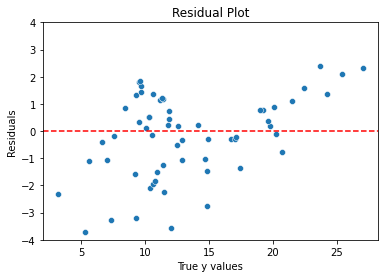

In [23]:
sns.scatterplot(x=y_test, y=test_residuals)
plt.axhline(y=0, color='r', ls='--')
plt.ylim(-4, 4)
plt.title('Residual Plot')
plt.xlabel('True y values')
plt.ylabel('Residuals')

As we can see, that isn't a clear line, curve or pattern. The residuals look random. So, we can say that linear regression is a good choice for our problem. 



*Residual Distribution*

Text(0.5, 6.79999999999999, 'Residuals')

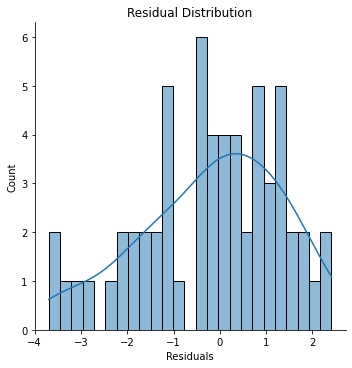

In [24]:
sns.displot(test_residuals, bins=25, kde=True)
plt.title('Residual Distribution')
plt.xlabel('Residuals')

As we can see, the distribution is close to a normal distribution. As expected, it shows us that linear regression fits to our problem.

## Retrain the model on full dataset



Now, that we are already satisfied with the model and we won't want to make changes anymore, we retrain it on the entire dataset.

In [25]:
final_model = LinearRegression()

In [26]:
final_model.fit(X,y)

LinearRegression()

## Interpreting the Coefficients of the Model

Let's analyse the coefficients of our model.

In [27]:
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

So we have:

sales = 0.04576465.TV_spend +  0.18853002.radio_spend - 0.00103749.newspaper_spend

*TV Spend*

* Holding all other features fixed, a 1 unit (A thousand dollars) increase in TV Spend is associated with an increase in sales of  0.045 "sales units", in this case 1000s of units . 
* This basically means that for every $1000 dollars spend on TV Ads, we could expect 45 more units sold.

*Radio Spend*
* Holding all other features fixed, a 1 unit (A thousand dollars) increase in Radio Spend is associated with an increase in sales of  0.188 "sales units", in this case 1000s of units . 
* This basically means that for every $1000 dollars spend on Radio Ads, we could expect 188 more units sold.

*Newspaper Spend*
* Holding all other features fixed, a 1 unit (A thousand dollars) increase in Newspaper Spend is associated with a **decrease** in sales of  0.001 "sales units", in this case 1000s of units . 
* This basically means that for every $1000 dollars spend on Newspaper Ads, we could actually expect to sell 1 less unit. Being so close to 0, this heavily implies that newspaper spend has no real effect on sales.

**Note:** We can only make these afirmations, because the features are all in the same unit.

## Model Persistence

*Saving the model*

In [28]:
from joblib import dump, load

In [29]:
dump(final_model, 'final_sales_model.joblib')

['final_sales_model.joblib']

*Loading a saved model*

In [30]:
loaded_model = load('final_sales_model.joblib')

## Predicting on New Data

Now, that we have a trained model, we can see the predictions for a new campaign.

In [31]:
new_campaign = [[149,22,12]]

In [32]:
loaded_model.predict(new_campaign)

array([13.893032])